# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [13]:
data=data.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"})
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
import pandas_profiling as pp
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='Delivery_time_report.html')

# Looking at the report, there is no need of any EDA related work. There are no outliers, duplicate values, so we can go ahead for model

# Correlation

In [7]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


# 0.825997 is good correlation

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

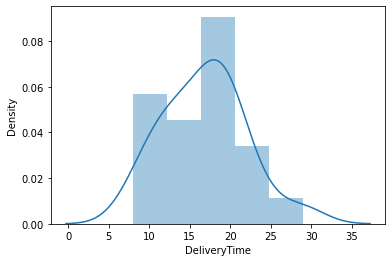

In [11]:
import seaborn as sns
sns.distplot(data['DeliveryTime'])

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

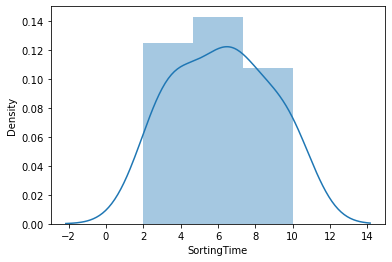

In [10]:
import seaborn as sns
sns.distplot(data['SortingTime'])

# Fitting a Linear Regression Model

In [3]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data).fit()

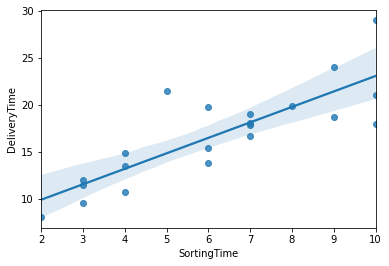

In [12]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data);

In [6]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [7]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict delivery time using sorting time

In [14]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([20,15,11])

In [15]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [17]:
data_pred

,SortingTime
0,20
1,15
2,11


In [19]:
model.predict(data_pred)

0    39.563132
1    31.318032
2    24.721953
dtype: float64

# For Sorting time values of 20,15,11 we get the Delivery time predicted values as 39.56, 31.318 and 24.72 respectively.